### `Trapezoidal` velocity profile

2.0
1.0


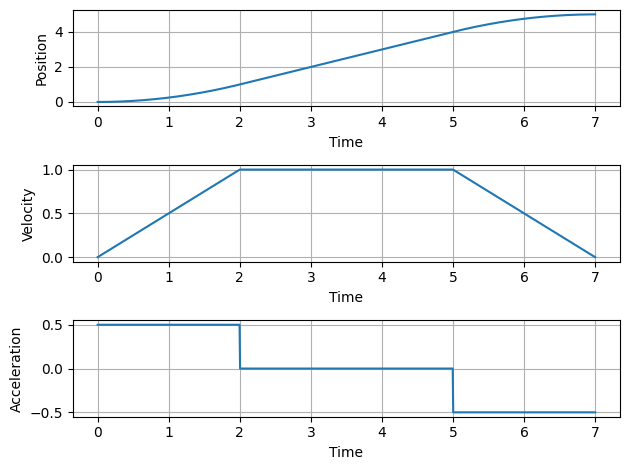

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
v_max = 1.0  # peak velocity
a_max = 0.5  # max acceleration
d_total = 5.0  # total distance

t_ramp = v_max / a_max  # time to accelerate to v_max
print(t_ramp)
d_ramp = 0.5 * a_max * t_ramp ** 2  # distance covered during acceleration (and deceleration)
print(d_ramp)


# Time for constant velocity
if d_total <= 2 * d_ramp:
    # In this case we don't reach the max velocity
    t_ramp = np.sqrt(d_total / a_max)
    t_flat = 0
else:
    t_flat = (d_total - 2 * d_ramp) / v_max

# Total time
t_total = 2 * t_ramp + t_flat

# Time vector
t = np.linspace(0, t_total, 1000)

# Initialize arrays
position = np.zeros_like(t)
velocity = np.zeros_like(t)
acceleration = np.zeros_like(t)

for i in range(len(t)):
    if t[i] < t_ramp:   # Acceleration
        position[i] = 0.5 * a_max * t[i]**2 # eqn. (2.2.1a)
        velocity[i] = a_max * t[i]
        acceleration[i] = a_max
    elif t[i] < (t_ramp + t_flat):  # Constant velocity
        position[i] = v_max * (t[i] - t_ramp / 2)
        velocity[i] = v_max
        acceleration[i] = 0
    else:   # Deceleration
        position[i] = d_total - 0.5 * a_max * (t_total - t[i])**2
        velocity[i] = v_max - a_max * (t[i] - t_ramp - t_flat)
        acceleration[i] = -a_max

# Plot
plt.figure()

plt.subplot(3, 1, 1)
plt.plot(t, position, label='position')
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, velocity, label='velocity')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, acceleration, label='acceleration')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.grid(True)

plt.tight_layout()
plt.show()


In [2]:
import math

def trapezoidal_velocity_profile(distance, max_acceleration, max_deceleration, max_velocity, time_step=0.01):
    # Calculate the time needed to reach max velocity under max acceleration
    time_to_max_velocity = max_velocity / max_acceleration

    # Calculate the distance covered during acceleration and deceleration
    accel_distance = 0.5 * max_acceleration * time_to_max_velocity**2
    decel_distance = 0.5 * max_deceleration * time_to_max_velocity**2

    # Check if the total distance is less than the sum of accel_distance and decel_distance
    if distance < accel_distance + decel_distance:
        raise ValueError("The total distance is too short for this acceleration/deceleration and max velocity.")

    # Calculate the distance to be covered at max velocity
    constant_velocity_distance = distance - accel_distance - decel_distance

    # Calculate the time spent at max velocity
    constant_velocity_time = constant_velocity_distance / max_velocity

    # Initialize the current velocity, position and time
    current_velocity = 0
    current_position = 0
    current_time = 0

    # Initialize the list of positions
    positions = []
    velocities = []

    # While the current time is less than the total time
    while current_position < distance:
        # If we are still accelerating
        if current_time < time_to_max_velocity:
            current_velocity += max_acceleration * time_step
        # If we are at max velocity
        elif current_time < time_to_max_velocity + constant_velocity_time:
            current_velocity = max_velocity
        # If we are decelerating
        else:
            current_velocity -= max_deceleration * time_step

        # Calculate the current position
        current_position += current_velocity * time_step

        # Add the current position to the list of positions
        positions.append(current_position)
        velocities.append(current_velocity)

        # Increment the current time
        current_time += time_step

    return positions, velocities

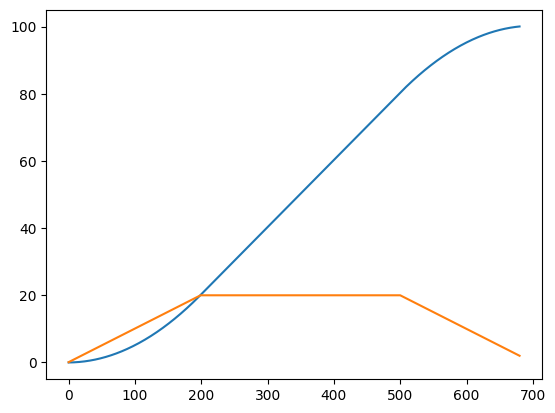

In [3]:
import matplotlib.pyplot as plt

# Test the function
positions, velocities = trapezoidal_velocity_profile(100, 10, 10, 20)

plt.plot(positions)
plt.plot(velocities)
plt.show()

### `S-spline` Velocity profile

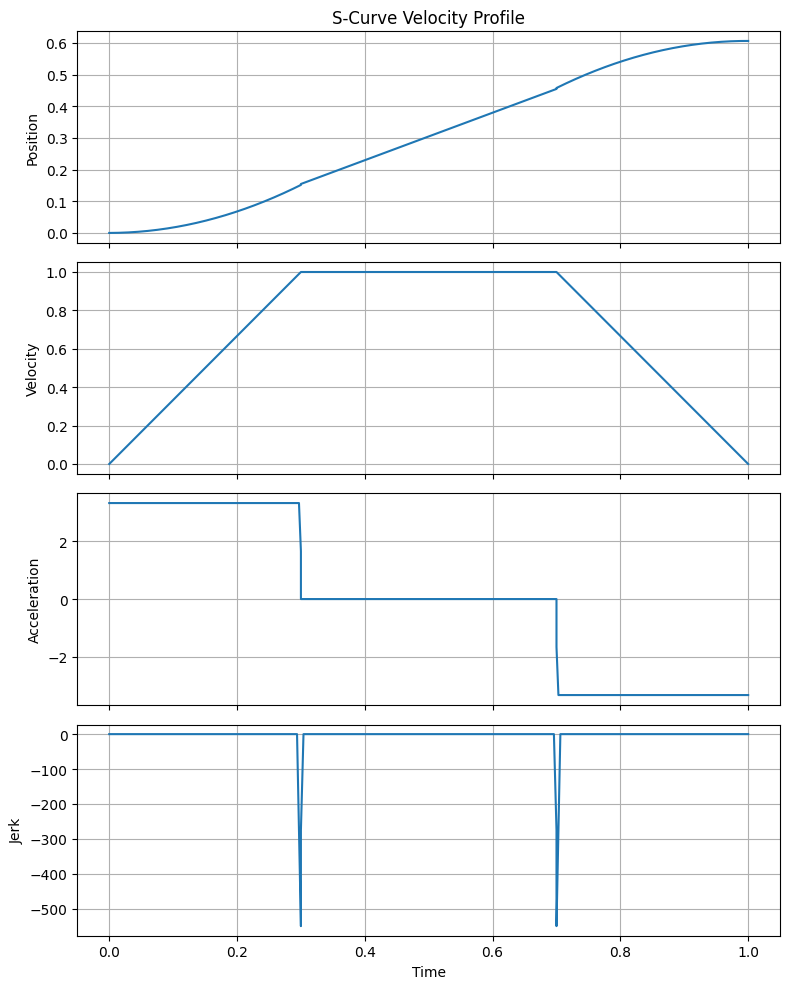

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the S-curve velocity profile
t_total = 1.0  # Total time
t_ramp = 0.3   # Time for acceleration and deceleration ramps

# Define the time intervals
t1 = np.linspace(0, t_ramp, num=100)              # Acceleration ramp
t2 = np.linspace(t_ramp, t_total - t_ramp, num=100)  # Constant velocity
t3 = np.linspace(t_total - t_ramp, t_total, num=100)  # Deceleration ramp

# Define the velocity profile for each interval
v_max = 1.0   # Maximum velocity
a_max = v_max / t_ramp   # Maximum acceleration/deceleration

v1 = a_max * t1    # Acceleration ramp
v2 = np.ones_like(t2) * v_max   # Constant velocity
v3 = v_max - a_max * (t3 - (t_total - t_ramp))  # Deceleration ramp

# Concatenate the time and velocity arrays
t = np.concatenate((t1, t2, t3))
v = np.concatenate((v1, v2, v3))

# Calculate position (p), acceleration (a), and jerk (j) based on velocity (v)
p = np.cumsum(v) * (t[1] - t[0])  # Integration of velocity to get position
a = np.gradient(v, t[1] - t[0])  # Differentiation of velocity to get acceleration
j = np.gradient(a, t[1] - t[0])  # Differentiation of acceleration to get jerk

# Plot the S-curve velocity profile
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(8, 10))
ax1.plot(t, p)
ax1.set_ylabel('Position')
ax1.set_title('S-Curve Velocity Profile')
ax1.grid(True)

ax2.plot(t, v)
ax2.set_ylabel('Velocity')
ax2.grid(True)

ax3.plot(t, a)
ax3.set_ylabel('Acceleration')
ax3.grid(True)

ax4.plot(t, j)
ax4.set_ylabel('Jerk')
ax4.set_xlabel('Time')
ax4.grid(True)

plt.tight_layout()
plt.show()


### Cubic B-spline

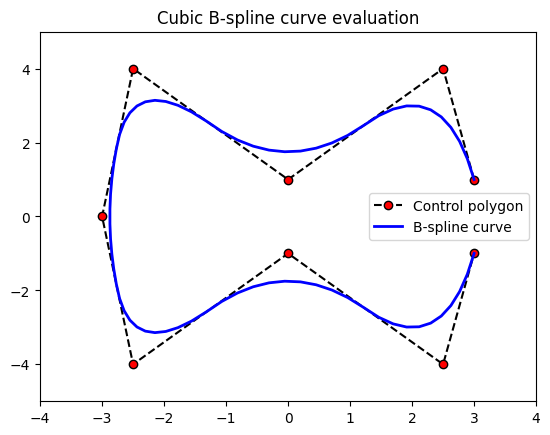

In [5]:
import numpy as np
from scipy import interpolate 
import matplotlib.pyplot as plt
 
plist = [(3 , 1), (2.5, 4), (0, 1),
         (-2.5, 4),(-3, 0), (-2.5, -4),
          (0, -1), (2.5, -4), (3, -1),]
ctr =np.array(plist)
 
x=ctr[:,0]
y=ctr[:,1]
 
l=len(x)
 
Order = 2
 
t=np.linspace(0,1,l-(Order-1),endpoint=True)
t=np.append(np.zeros(Order),t)
t=np.append(t,np.zeros(Order)+1)
 
tck=[t,[x,y],Order]
u3=np.linspace(0,1,(max(l*2,70)),endpoint=True)
out = interpolate.splev(u3,tck)
 
plt.plot(x,y,'k--',label='Control polygon',marker='o',markerfacecolor='red')
plt.plot(out[0],out[1],'b',linewidth=2.0,label='B-spline curve')
plt.legend(loc='best')
plt.axis([min(x)-1, max(x)+1, min(y)-1, max(y)+1])
plt.title('Cubic B-spline curve evaluation')
plt.show()
